In [ ]:
### Investigate a Dataset

# Titanic Data


#### Data Dictionary
<b>Variable	Definition	Key</b>

survival 	Survival 	0 = No, 1 = Yes

pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd

sex 	Sex

Age 	Age in years

sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	[Cabin number](http://www.titanicandco.com/inside.html)

embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

Dependent variable: survival
Independente variable: cabin number, pclass, age, sex, 

Questions:

1) NÃO HÁ RELACIONAMENTO - O esvaziamento foi desordenado, mas quantos parentes sobreviveram juntos, o que poderiam indicar que desocuparam em conjunto?

2) Quanto foi o percentual de passageiros da 1ª classe que sobreviveram em relação aos passageiros da 2ª e 3ª, já que os botes estavam no andar correspondente da 1ª classe?

3) Dentre os sobreviventes qual a proporção de mulheres em relação aos homens?

4) Qual a relação entre faixas de idade, já que a preferência foi por mulheres e crianças?

5) Há correlação entre a cabine e o fato da pessoa ter sobrevivido?

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns

titanic_df = pd.read_csv('titanic-data.csv')

In [37]:
def grade_age(age):
    if age > 0 and age <= 2: #Infants (0 - 2)
        return 'Infant'
    elif age > 2 and age <= 12: #Children (0 – 12)
        return 'Child'
    elif age > 12 and age <= 17: #Adolescents (13 – 17)
        return 'Adolescent'
    elif age > 17 and age < 65: #Adults (18+)
        return 'Adult'
    elif age >= 65:
        return 'Older Adult'
    else:
        return 'Unknown'
    
titanic_df['Age grade'] = titanic_df['Age'].apply(grade_age)

In [38]:
survived_df = titanic_df[titanic_df['Survived'] == 1] # It can be ignored, if consider only survivors on the sum calculus
survived_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age grade
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Adolescent


2) Quanto foi o percentual de passageiros da 1ª classe que sobreviveram em relação aos passageiros da 2ª e 3ª, já que os botes estavam no andar correspondente da 1ª classe?

Populating the interactive namespace from numpy and matplotlib


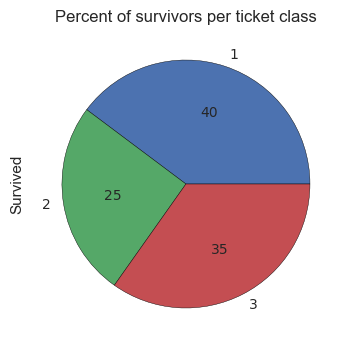

In [39]:
%pylab inline
survived_ticket_class = survived_df.groupby(['Pclass'])['Survived'].sum()
#survived_ticket_class.set_index([['first', 'second', 'third']])
survived_ticket_class.plot(kind='pie', autopct='%2.f', figsize=(4,4), title='Percent of survivors per ticket class')

3) Dentre os sobreviventes qual a proporção de mulheres em relação aos homens?
4) Qual a relação entre faixas de idade, já que a preferência foi por mulheres e crianças?

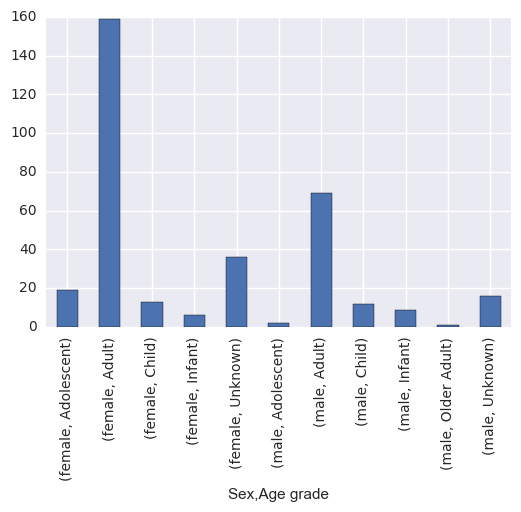

In [44]:
survived_df.groupby(['Sex','Age grade'])['Survived'].sum().plot(kind='bar')